# Import Library

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import other libraries if needed
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Import Dataset

In [117]:
train_set = pd.read_csv('train_set.csv')

In [118]:
val_set = pd.read_csv('val_set.csv')

In [119]:
train.head(7)

,id,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,226786.0,25.000000,17.0,0.0,1.000000,0.522907,0.065153,3.0,1.0,0.0,...,0.0,0.0,1.0,1.0,6.0,7.0,35.0,1.0,17.0,1.0
1,163910.0,34.000000,26.0,0.0,1.000000,0.522907,0.057792,3.0,1.0,0.0,...,1.0,0.0,0.0,40.0,4.0,10.0,105.0,0.0,27.0,1.0
2,113381.0,27.218001,29.0,0.0,0.987694,0.079963,0.057663,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,163038.0,25.000000,17.0,0.0,1.000000,0.522907,0.067413,3.0,1.0,0.0,...,1.0,0.0,1.0,26.0,1.0,12.0,232.0,0.0,35.0,1.0
4,117472.0,20.000000,12.0,0.0,1.000000,0.079963,0.061459,3.0,1.0,0.0,...,1.0,0.0,1.0,25.0,1.0,18.0,33.0,1.0,4.0,1.0
5,93450.0,24.000000,16.0,0.0,1.000000,0.522907,0.062538,3.0,1.0,0.0,...,0.0,0.0,0.0,27.0,1.0,10.0,8.0,4.0,3.0,1.0
6,199627.0,35.000000,27.0,0.0,1.000000,0.522907,0.051936,3.0,1.0,0.0,...,0.0,0.0,1.0,17.0,4.0,10.0,0.0,0.0,145.0,1.0


In [120]:
val.head(7)

,id,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,14951.0,31.0,23.0,0.0,1.0,0.522907,0.062753,3.0,1.0,0.0,...,0.0,0.0,1.0,3.0,13.000000,12.0,89.0,0.000000,27.0,1.0
1,38319.0,27.0,19.0,0.0,1.0,0.079963,0.071288,3.0,1.0,0.0,...,0.0,0.0,1.0,6.0,11.000000,17.0,126.0,2.000000,126.0,1.0
2,171787.0,30.0,22.0,0.0,1.0,0.522907,0.071271,3.0,1.0,0.0,...,0.0,0.0,1.0,15.0,1.000000,11.0,113.0,1.000000,40.0,1.0
3,137088.0,22.0,14.0,0.0,1.0,0.522907,0.064515,3.0,1.0,0.0,...,0.0,0.0,1.0,42.0,6.000000,12.0,109.0,0.000000,120.0,1.0
4,66115.0,27.0,19.0,0.0,1.0,0.522907,0.063795,3.0,1.0,0.0,...,0.0,0.0,1.0,29.0,5.000000,14.0,121.0,0.000000,132.0,1.0
5,32892.0,28.0,20.0,0.0,1.0,0.005616,0.060816,2.0,1.0,0.0,...,0.0,0.0,1.0,47.0,7.260422,38.0,96.0,1.137975,23.0,1.0
6,179253.0,29.0,21.0,0.0,1.0,0.522907,0.065225,3.0,1.0,0.0,...,1.0,0.0,0.0,30.0,1.000000,4.0,49.0,0.000000,24.0,1.0


# Imbalancing

In [121]:
# Plot class distribution
def plot_classes(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=["0", "1"])

    print(y.value_counts())
    print()

label
1.0    71828
0.0     5800
Name: count, dtype: int64



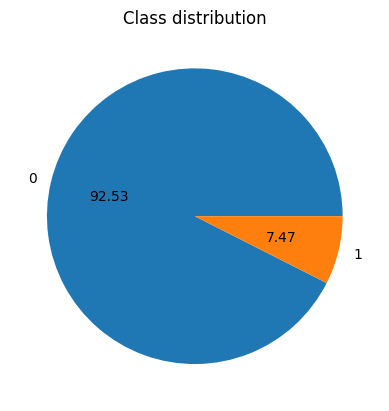

In [122]:
plot_classes(train_set['label'])

In [123]:
from imblearn.over_sampling import SMOTE

def balance_classes(X_t, y_t):
    sm = SMOTE(random_state=42)
    X_t_res, y_t_res = sm.fit_resample(X_t, y_t)
    return X_t_res, y_t_res

In [124]:
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class PCATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = PCA(n_components=self.n_components)
        self.num_columns = None
        self.pca_columns = None

    def fit(self, X, y=None):
        # Identify numerical columns
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

        # Filter for continuous columns (unique values > 2)
        self.num_columns = [col for col in numerical_cols if X[col].nunique() > 2]

        # Fit PCA on the selected numerical columns
        self.pca.fit(X[self.num_columns])

        # Create column names for PCA components
        self.pca_columns = [f'PCA_{i+1}' for i in range(self.pca.n_components_)]
        return self

    def transform(self, X):
        """
        Apply PCA transformation to the selected columns and return the modified DataFrame.
        """
        X_transformed = X.copy()

        # Apply PCA to the selected numerical columns
        pca_result = self.pca.transform(X[self.num_columns])

        # Create a DataFrame for PCA components
        pca_df = pd.DataFrame(pca_result, columns=self.pca_columns, index=X.index)

        # Drop the original numerical columns and concatenate PCA components
        X_transformed = X_transformed.drop(columns=self.num_columns, errors='ignore')
        X_transformed = pd.concat([X_transformed, pca_df], axis=1)

        return X_transformed

In [125]:
FEATURES_TO_DROP2 = [
'NoOfLettersInURL',
'DomainLength',
'DomainTitleMatchScore',
'CharContinuationRate',
'TLDLength',
'TLDLegitimateProb',
"NoOfSubDomain",
'NoOfObfuscatedChar',
"ObfuscationRatio",
'NoOfDegitsInURL',
'DegitRatioInURL',
'NoOfEqualsInURL',
'NoOfQMarkInURL',
'NoOfAmpersandInURL',
'NoOfPopUp'
]

In [126]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Drop the specified features
        X_dropped = X.drop(columns=self.features_to_drop, errors='ignore')
        return X_dropped

In [127]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()
        self.num_columns = None  # Placeholder for numerical columns
        self.url_title_column = 'URLTitleMatchScore'

    def fit(self, X, y=None):
        # Identify numerical columns excluding the 'URLTitleMatchScore' column and columns with nunique=2
        self.num_columns = [
            col for col in X.select_dtypes(include=['int64', 'float64']).columns
            if col != self.url_title_column and X[col].nunique() > 2
        ]

        # Fit the RobustScaler to the numerical columns
        self.scaler.fit(X[self.num_columns])
        return self

    def transform(self, X):
        # Copy the DataFrame to avoid modifying the original
        X_transformed = X.copy()

        # Apply RobustScaler to the numerical columns
        if self.num_columns:  # Ensure there are columns to scale
            X_transformed[self.num_columns] = self.scaler.transform(X[self.num_columns])

        # Apply Log Transformation to 'URLTitleMatchScore'
        if self.url_title_column in X_transformed.columns:
            X_transformed[self.url_title_column] = X_transformed[self.url_title_column].apply(
                lambda x: np.log1p(x) if pd.notna(x) and x >= 0 else np.nan
            )

        return X_transformed

In [128]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

# Note: You can add or delete preprocessing components from this pipeline

pipe = Pipeline([("pca", PCATransformer()),
                ("dropper",FeatureDropper(FEATURES_TO_DROP2)),
                 ("scaler", FeatureScaler()),
])

train_set = pipe.fit_transform(train_set)
val_set = pipe.transform(val_set)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [129]:
def match_columns(train, test):
    # Get list of columns in training set
    train_cols = train.columns.tolist()

    # Get list of columns in test set
    test_cols = test.columns.tolist()

    # Remove any columns in test set that aren't in training set
    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)

    # Add any missing columns to test set and fill with 0
    for col in train_cols:
        if col not in test_cols:
            test[col] = 0

    # Reorder columns in test set to match training set
    test = test[train_cols]

    # Return modified test set
    return test

In [130]:
# Match the columns
val_set = match_columns(train_set, val_set)

In [131]:
val_set.shape

(19289, 43)

In [132]:
train_set.shape

(77628, 43)

In [133]:
train_set.columns = train_set.columns.str.strip()

In [134]:
X_train = train_set.drop(['label'], axis=1)
y_train = train_set['label']

In [135]:
# Perform resampling
X_train, y_train = balance_classes(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [136]:
column_count = X_train.shape[1]  # Number of columns in the DataFrame
# OR
column_count = len(X_train.columns)  # Alternative way to get the column count
print(column_count)

42


In [137]:
# Assuming FEATURES_TO_DROP2 is a list of column names to be dropped
val_set = val_set.drop(columns=FEATURES_TO_DROP2, errors='ignore')

# Coba dulu

In [138]:
# Step 1: Separate features and labels
# X_train = train_set.drop(columns=['id', 'label'])  # Drop non-feature columns
# y_train = train_set['label']

# X_val = val_set.drop(columns=['id', 'label'])
# y_val = val_set['label']


In [139]:
# Step 2: Scale numerical features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

In [140]:
# Convert scaled numpy array back to DataFrame
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# # If you also want to reset the index to match the original dataset
# X_train_scaled_df.reset_index(drop=True, inplace=True)

# # Display the DataFrame
# X_train_scaled_df.head()


In [141]:
# Step 3: Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [143]:
# Ensure 'label' column exists in val_set
if 'label' in val_set.columns:
    # Split val_set into features (val_set_x) and target (val_set_y)
    val_set_x = val_set.drop(columns=['label'])  # Features (all columns except 'label')
    val_set_y = val_set['label']                # Target variable (the 'label' column)
else:
    raise ValueError("The 'label' column is not present in val_set.")

# Display the results for verification
print("Features (val_set_x):")
print(val_set_x.head())
print("\nTarget (val_set_y):")
print(val_set_y.head())


Features (val_set_x):
   IsDomainIP  HasObfuscation  IsHTTPS  HasTitle  HasFavicon  Robots  \
0         0.0             0.0        1         1         0.0     0.0   
1         0.0             0.0        1         1         1.0     0.0   
2         0.0             0.0        1         1         1.0     0.0   
3         0.0             0.0        1         0         1.0     0.0   
4         0.0             0.0        1         1         1.0     0.0   

   IsResponsive  NoOfURLRedirect  NoOfSelfRedirect  HasDescription  ...  \
0           1.0              0.0               0.0             1.0  ...   
1           1.0              1.0               0.0             1.0  ...   
2           1.0              0.0               0.0             1.0  ...   
3           1.0              0.0               0.0             1.0  ...   
4           1.0              0.0               0.0             1.0  ...   

     PCA_13    PCA_14    PCA_15    PCA_16    PCA_17    PCA_18    PCA_19  \
0  0.131278  0.4384

In [145]:
# Step 4: Predict and Evaluate on Validation Set
y_pred = model.predict(val_set_x)

In [146]:
# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Confusion Matrix:
 [[ 1327   118]
 [   17 17827]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      1445
         1.0       0.99      1.00      1.00     17844

    accuracy                           0.99     19289
   macro avg       0.99      0.96      0.97     19289
weighted avg       0.99      0.99      0.99     19289

